In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labyrinth2D import Labyrinth2D
from labSolverTD import LabyrinthSolverTD
from labSolverTDEligibility import LabyrinthSolverTDEligibility

%load_ext autoreload
%autoreload 2

Target accessible using at least 22.0 steps


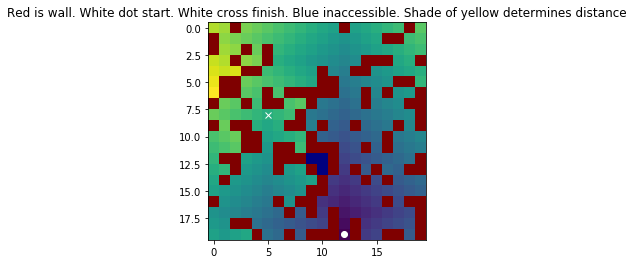

In [9]:
randLab = Labyrinth2D(labShape=(20,20), probwall=0.3)
randLab.solve_bfs()

fig, ax = plt.subplots()
randLab.plot_value(ax)
plt.show()

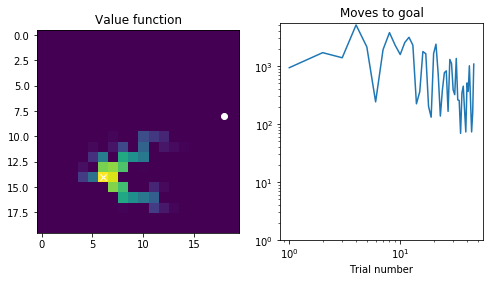

In [10]:
solver1 = LabyrinthSolverTD(randLab, alpha=0.5)
valueMap, resultTimes = solver1.solve()
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
randLab.plot_value(ax[0], valueMap)
randLab.plot_result(ax[1], resultTimes)

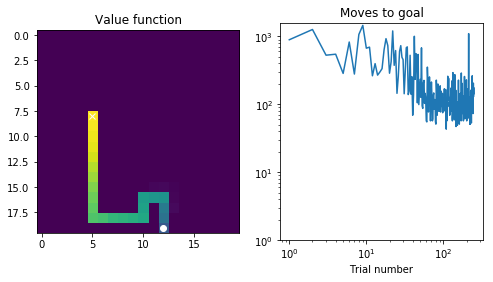

In [14]:
solver2 = LabyrinthSolverTDEligibility(randLab, alpha=0.1, gammaET=0.99)
valueMap, resultTimes = solver2.solve(maxMoves=50000, updateVisited=False)
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
randLab.plot_value(ax[0], valueMap)
randLab.plot_result(ax[1], resultTimes)

**Conclusions-Eligibility**

1. Unstable for large learning rates
2. Discounting factor must increase with increasing path length, otherwise it has little impact on the beginning of the trial
3. What to do with unvisited cells
   * If leaked (forgetting), then system learns one reasonable path to goal. However, it gets stuck in local equillibria, stopping to explore anything else. Also, it gets completely lost if it leaves the known path.
   * If left untouched, system explores whole maze, and can get to the goal from any point within reasonable time. However, it somehow spends more than optimal time wandering around
4. Very strong explore-exploit tradeoff for movement policy exponent. If exponent high, prioritizes smallest gradients
